In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# directories and data
data_directory = "/home/edgar/astropology/data/spectra/"

meta_data_df = pd.read_csv(
    f"{data_directory}/galaxy_science.csv.gz",
    index_col="specobjid"
)
meta_data_df[["z", "snMedian"]].describe()

,z,snMedian
count,870842.000000,870842.000000
mean,0.146700,13.089539
std,0.113584,7.608738
min,-0.011088,0.000000
25%,0.073625,8.002567
50%,0.115263,12.001455
75%,0.175267,16.544645
max,1.002166,98.863690


,z,snMedian
count,862259.000000,862259.000000
mean,0.148129,13.126309
std,0.113236,7.537802
min,0.010000,0.598950
25%,0.074688,8.071934
50%,0.116060,12.034250
75%,0.176257,16.554265
max,1.002166,98.104000


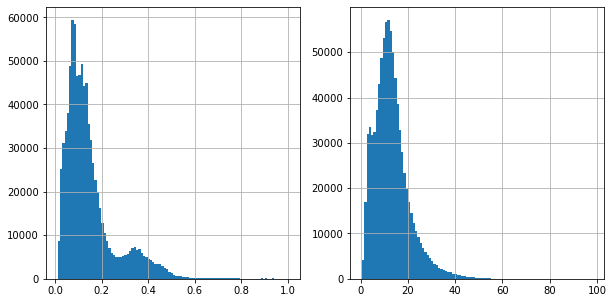

In [3]:
z_mask = 0.01 <= meta_data_df["z"].to_numpy()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

meta_data_df.loc[z_mask, "z"].hist(bins=100, ax=axs[0])
meta_data_df.loc[z_mask, "snMedian"].hist(bins=100, ax=axs[1])

meta_data_df.loc[z_mask, ["z", "snMedian"]].describe()

,z,snMedian
count,46708.000000,46708.000000
mean,0.125501,11.998778
std,0.053453,0.231369
min,0.010008,11.600020
25%,0.085261,11.798707
50%,0.124479,11.998140
75%,0.161636,12.198898
max,0.981420,12.399950


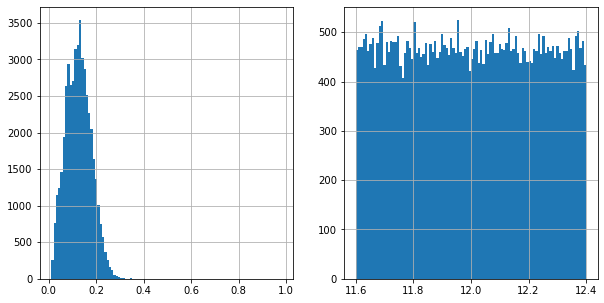

In [4]:
snr_mask = np.logical_and(
    11.6 < meta_data_df["snMedian"], meta_data_df["snMedian"] < 12.4
)
mask = snr_mask * z_mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

meta_data_df.loc[mask, "z"].hist(bins=100, ax=axs[0])
meta_data_df.loc[mask, "snMedian"].hist(bins=100, ax=axs[1])

meta_data_df.loc[mask, ["z", "snMedian"]].describe()

,z,snMedian
count,46194.000000,46194.000000
mean,0.123784,11.999004
std,0.050621,0.231391
min,0.010008,11.600020
25%,0.084875,11.798858
50%,0.123700,11.998710
75%,0.160077,12.199185
max,0.249996,12.399950


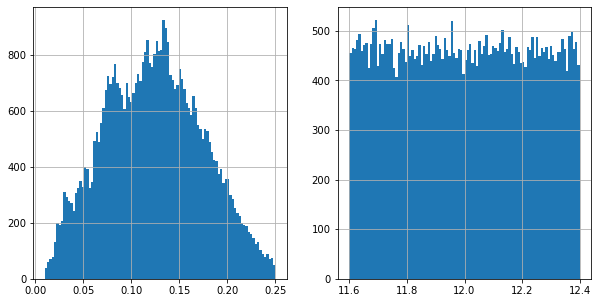

In [5]:
z_mask = np.logical_and(
    0.01 <= meta_data_df["z"], meta_data_df["z"] <= 0.25
)

mask = snr_mask * z_mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

meta_data_df.loc[mask, "z"].hist(bins=100, ax=axs[0])
meta_data_df.loc[mask, "snMedian"].hist(bins=100, ax=axs[1])

meta_data_df.loc[mask, ["z", "snMedian"]].describe()

In [11]:
# save list of specobjid and meta data
meta_data_df.loc[mask].to_csv(f"{data_directory}/spectra.csv.gz")